In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from statsmodels.formula.api import ols

from statsmodels.stats.anova import anova_lm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
churn = pd.read_csv('/content/churn.csv')

In [ ]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
churn = churn.drop(['customerID'], axis=1)
churn.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
# Checking null values
churn.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The target variable is set to be binary

In [ ]:
churn['Churn'] = churn['Churn'].apply(lambda x : 1 if x == 'Yes' else 0)

In [ ]:
# Get numerical and categorical columns
def get_feature_types(df):

    features_list = df.columns.values.tolist()
    numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    categorical_columns = []
    numerical_columns = []

    for feat in features_list:
        if df[feat].dtype in numerics:
            numerical_columns.append(feat)
        else:
            categorical_columns.append(feat)

    return categorical_columns, numerical_columns

In [ ]:
get_feature_types(churn)

(['gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'TotalCharges'],
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn'])

`TotalCharges` is an `object`, despite having `float` values. After a brief analysis, it was discovered that several lines have a `TotalCharges` value equals to an empty string. So, it was decided to remove the samples.

Another strategy would be to define a policy for missing values handling.

In [ ]:
list_of_index = churn[churn['TotalCharges'] == ' '].index
for i in list_of_index:
  churn = churn.drop(i)

churn = churn.reset_index(drop=True)
churn = churn.astype({'TotalCharges' : float})
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


### Visualizing the rate of churn customers

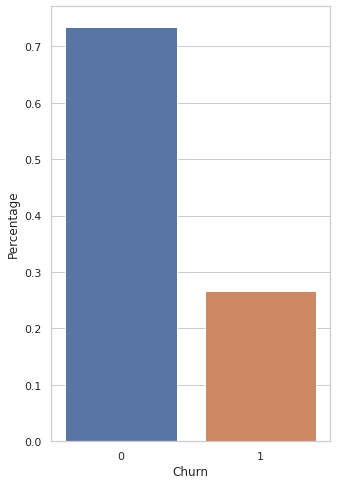

In [ ]:
sns.set(rc = {'figure.figsize':(5,8)})
sns.set_theme(style="whitegrid")
churn_rate = churn['Churn'].value_counts(normalize=True).reset_index(name='Percentage')
churn_rate = churn_rate.rename(columns={'index' : 'Churn'})

plt_churn = sns.barplot(x="Churn", y='Percentage', data=churn_rate)

In [ ]:
print('Rate of retained customers: ' + str(round(churn_rate['Percentage'][0], 2)))
print('Rate of churned customers: ' + str(round(churn_rate['Percentage'][1], 2)))

Rate of retained customers: 0.73
Rate of churned customers: 0.27


In [ ]:
categorical, numerical = get_feature_types(churn)

In [ ]:
def df_check_categorical(df, cat_cols):
  for i in range(len(cat_cols)):
    count = 0
    for j in range(len(df[cat_cols[i]].value_counts())):
      count += int(df[cat_cols[i]].value_counts()[j])

    if count == df.shape[0]:
       print('The column ' + cat_cols[i] + ' has the same size of the dataframe')
    else:
       print('The column ' + cat_cols[i] + ' has NOT the same size of the dataframe and it should be investigated')

In [ ]:
df_check_categorical(churn, categorical)

The column gender has the same size of the dataframe
The column Partner has the same size of the dataframe
The column Dependents has the same size of the dataframe
The column PhoneService has the same size of the dataframe
The column MultipleLines has the same size of the dataframe
The column InternetService has the same size of the dataframe
The column OnlineSecurity has the same size of the dataframe
The column OnlineBackup has the same size of the dataframe
The column DeviceProtection has the same size of the dataframe
The column TechSupport has the same size of the dataframe
The column StreamingTV has the same size of the dataframe
The column StreamingMovies has the same size of the dataframe
The column Contract has the same size of the dataframe
The column PaperlessBilling has the same size of the dataframe
The column PaymentMethod has the same size of the dataframe


### ANOVA

It is performed the ANOVA test for verifying the impact of the features on the target variable. The features that overcome $\alpha$ > 0.05 can be rejected, while the other ones have an influence on the final value of `Churn`




In [ ]:
formula = "Churn ~ gender + Partner + Dependents + PhoneService + MultipleLines + InternetService + OnlineSecurity + OnlineBackup + DeviceProtection + TechSupport + StreamingTV + StreamingMovies + Contract + PaperlessBilling + PaymentMethod"
lm = ols(formula, churn).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     126.0
Date:                Mon, 20 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:57:57   Log-Likelihood:                -3200.4
No. Observations:                7032   AIC:                             6441.
Df Residuals:                    7012   BIC:                             6578.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [ ]:
anova_results = anova_lm(lm, typ=2)
anova_results[anova_results['PR(>F)'] < 0.05].sort_values(by='PR(>F)')

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
Contract,39.002406,2.0,133.656827,1.078127e-57
InternetService,33.544043,2.0,114.951637,7.552510e-50
OnlineSecurity,15.187749,2.0,52.046694,3.652088e-23
OnlineBackup,14.818439,2.0,50.781113,1.271254e-22
TechSupport,12.889882,2.0,44.172165,8.632075e-20
StreamingMovies,12.578902,2.0,43.106471,2.473148e-19
StreamingTV,12.428624,2.0,42.591488,4.113430e-19
DeviceProtection,11.711427,2.0,40.133733,4.668180e-18
PaymentMethod,10.653946,3.0,24.339910,1.156758e-15
PaperlessBilling,2.407971,1.0,16.503685,4.908518e-05


In [ ]:
anova_results[anova_results['PR(>F)'] > 0.05].sort_values(by='PR(>F)')

,sum_sq,df,F,PR(>F)
Dependents,0.275122,1.0,1.885621,0.169741
PhoneService,0.130043,1.0,0.891283,0.345162
MultipleLines,0.260085,2.0,0.891283,0.345162
gender,0.096186,1.0,0.659240,0.416856


### Plotting ANOVA features impacting `Churn` the most



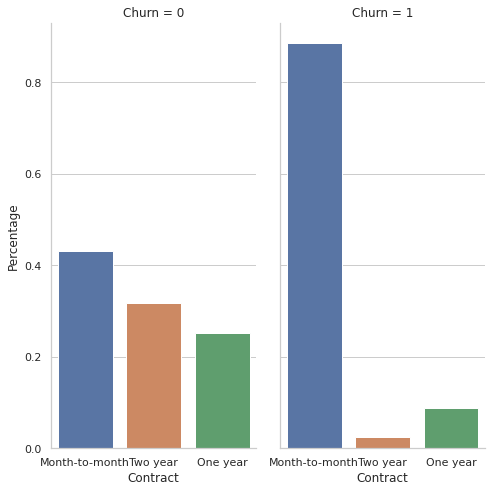

In [ ]:
# Contract
churn_contract = churn.groupby(['Churn'])['Contract'].value_counts(normalize=True).reset_index(name='Percentage')
plt_contract = sns.catplot(x='Contract', y='Percentage', data=churn_contract, col='Churn', kind='bar', aspect=.5, height=7)

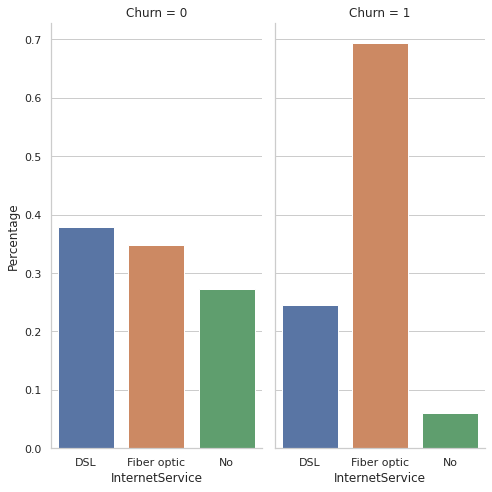

In [ ]:
# Internet Service
churn_internet = churn.groupby(['Churn'])['InternetService'].value_counts(normalize=True).reset_index(name='Percentage')
plt_internet = sns.catplot(x='InternetService', y='Percentage', data=churn_internet, col='Churn', kind='bar', aspect=.5, height=7)

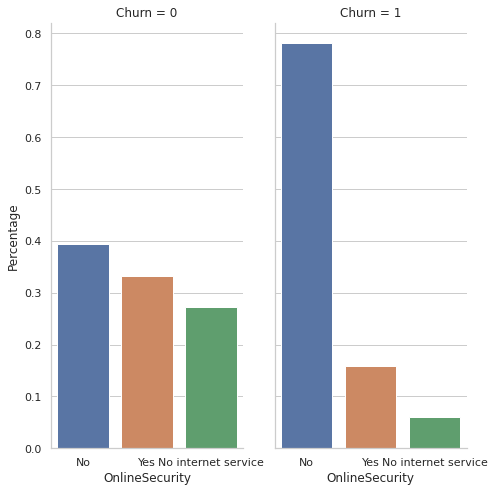

In [ ]:
# Online Security
churn_security = churn.groupby(['Churn'])['OnlineSecurity'].value_counts(normalize=True).reset_index(name='Percentage')
plt_security = sns.catplot(x='OnlineSecurity', y='Percentage', data=churn_security, col='Churn', kind='bar', aspect=.5, height=7)

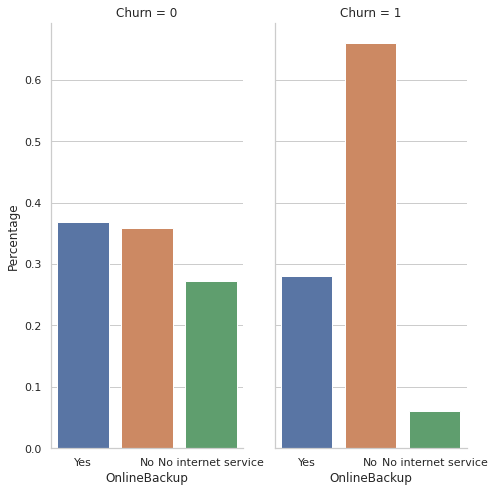

In [ ]:
# Online Backup
churn_backup = churn.groupby(['Churn'])['OnlineBackup'].value_counts(normalize=True).reset_index(name='Percentage')
plt_backup = sns.catplot(x='OnlineBackup', y='Percentage', data=churn_backup, col='Churn', kind='bar', aspect=.5, height=7)

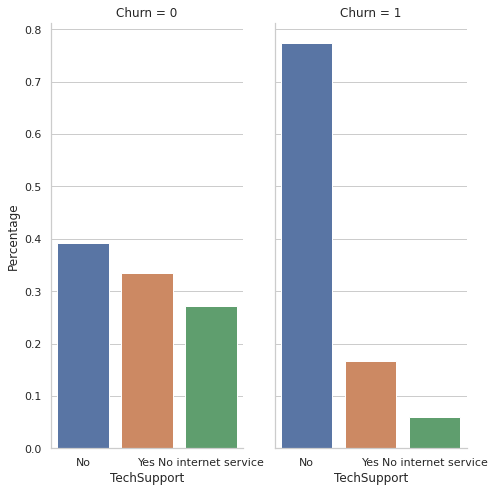

In [ ]:
# Tech Support
churn_support = churn.groupby(['Churn'])['TechSupport'].value_counts(normalize=True).reset_index(name='Percentage')
plt_support = sns.catplot(x='TechSupport', y='Percentage', data=churn_support, col='Churn', kind='bar', aspect=.5, height=7)

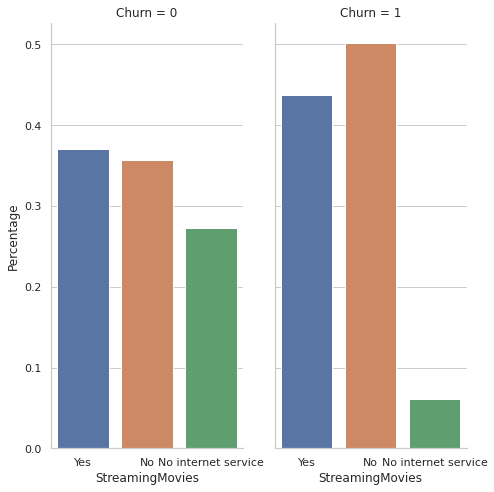

In [ ]:
# Streaming Movies
churn_movies = churn.groupby(['Churn'])['StreamingMovies'].value_counts(normalize=True).reset_index(name='Percentage')
plt_movies = sns.catplot(x='StreamingMovies', y='Percentage', data=churn_movies, col='Churn', kind='bar', aspect=.5, height=7)

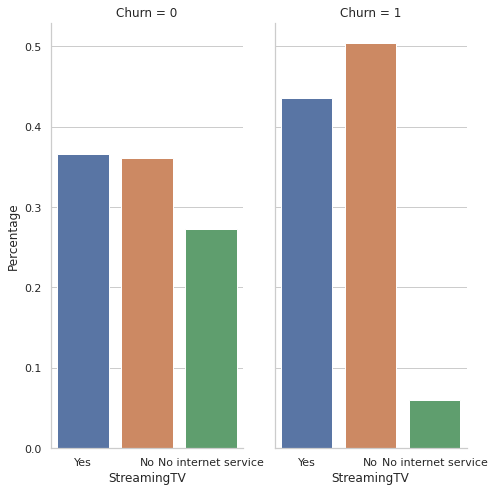

In [ ]:
# Streaming TV
churn_tv = churn.groupby(['Churn'])['StreamingTV'].value_counts(normalize=True).reset_index(name='Percentage')
plt_tv = sns.catplot(x='StreamingTV', y='Percentage', data=churn_tv, col='Churn', kind='bar', aspect=.5, height=7)

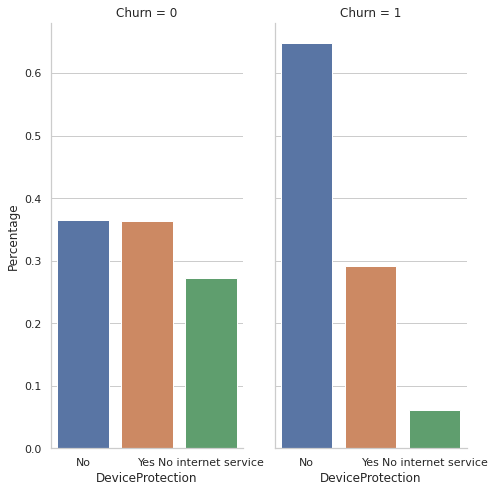

In [ ]:
# Device Protection
churn_protection = churn.groupby(['Churn'])['DeviceProtection'].value_counts(normalize=True).reset_index(name='Percentage')
plt_protection = sns.catplot(x='DeviceProtection', y='Percentage', data=churn_protection, col='Churn', kind='bar', aspect=.5, height=7)

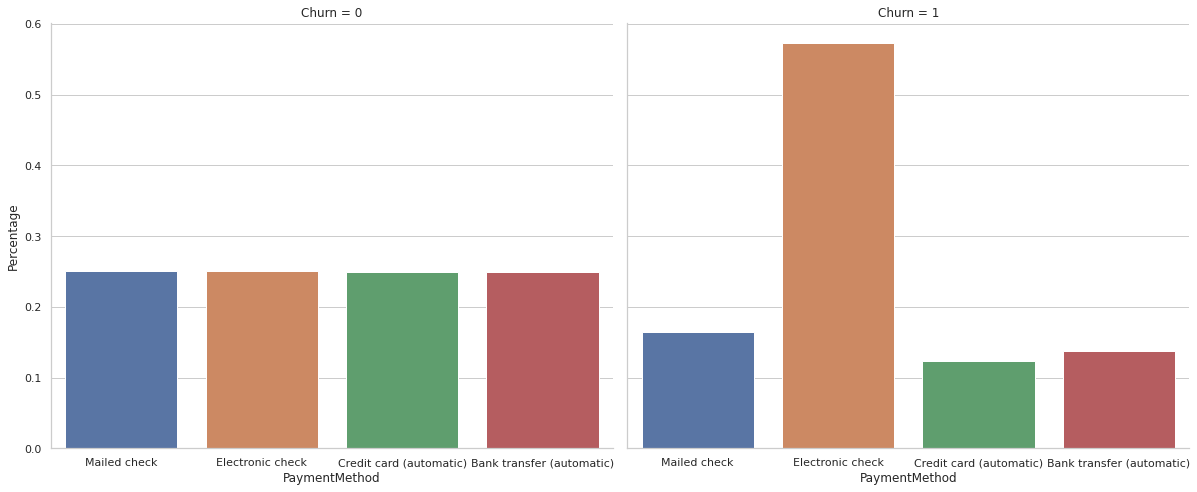

In [ ]:
# Payment Method
churn_payment = churn.groupby(['Churn'])['PaymentMethod'].value_counts(normalize=True).reset_index(name='Percentage')
plt_payment = sns.catplot(x='PaymentMethod', y='Percentage', data=churn_payment, col='Churn', kind='bar', aspect=1.2, height=7)

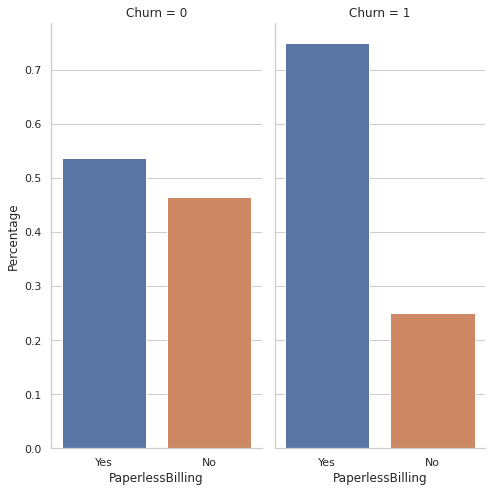

In [ ]:
# Paperless Billing
churn_billing = churn.groupby(['Churn'])['PaperlessBilling'].value_counts(normalize=True).reset_index(name='Percentage')
plt_billing = sns.catplot(x='PaperlessBilling', y='Percentage', data=churn_billing, col='Churn', kind='bar', aspect=.5, height=7)

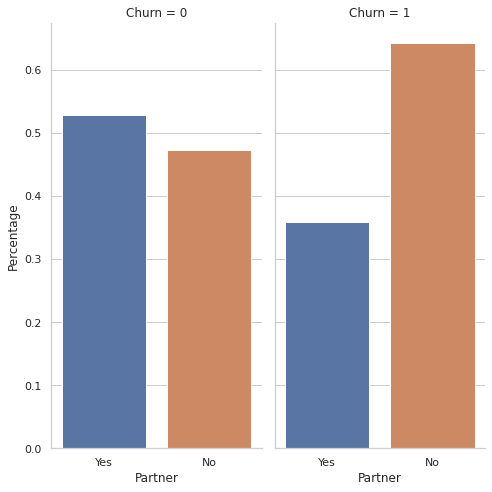

In [ ]:
# Partner
churn_partner = churn.groupby(['Churn'])['Partner'].value_counts(normalize=True).reset_index(name='Percentage')
plt_churn = sns.catplot(x='Partner', y='Percentage', data=churn_partner, col='Churn', kind='bar', aspect=.5, height=7)

## Feature Engineering

In [ ]:
churn['monthsOfSubscription'] = churn.apply(lambda x : int(x['TotalCharges'] / x['MonthlyCharges']), axis=1 )

In [ ]:
churn['additionalCosts'] = churn.apply(lambda x : x['TotalCharges'] - (x['monthsOfSubscription'] * x['MonthlyCharges']), axis=1 )

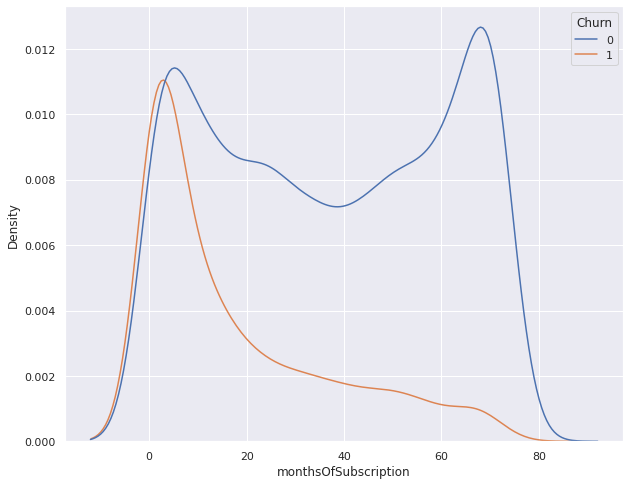

In [ ]:
sns.set(rc = {'figure.figsize':(10,8)})
plt_subscription_1 = sns.kdeplot(data=churn, x='monthsOfSubscription', color='red', hue='Churn')

### Numerical Features

In [ ]:
churn_charges = churn.groupby(['Churn']).agg({'tenure' : ['mean'], 'MonthlyCharges' : ['mean'], 'TotalCharges' : ['mean']})
churn_charges

,tenure,MonthlyCharges,TotalCharges
,mean,mean,mean
Churn,,,
0,37.650010,61.307408,2555.344141
1,17.979133,74.441332,1531.796094


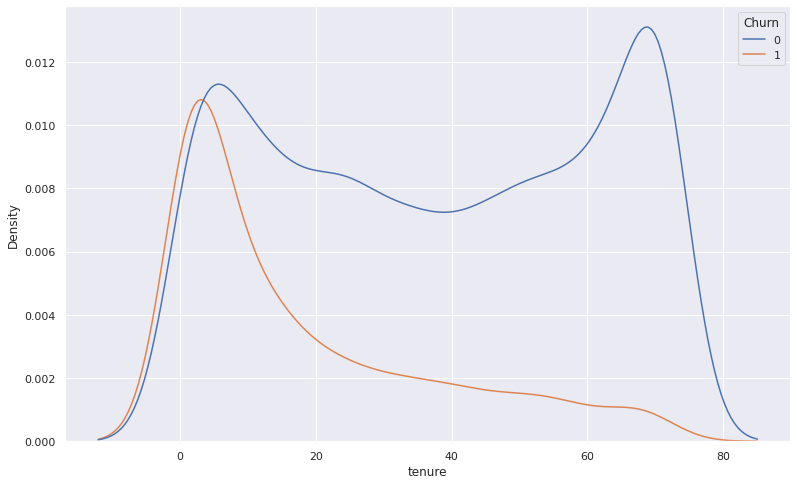

In [ ]:
sns.set(rc = {'figure.figsize':(13,8)})
sns.kdeplot(data=churn, x='tenure', hue='Churn', label='Churn')

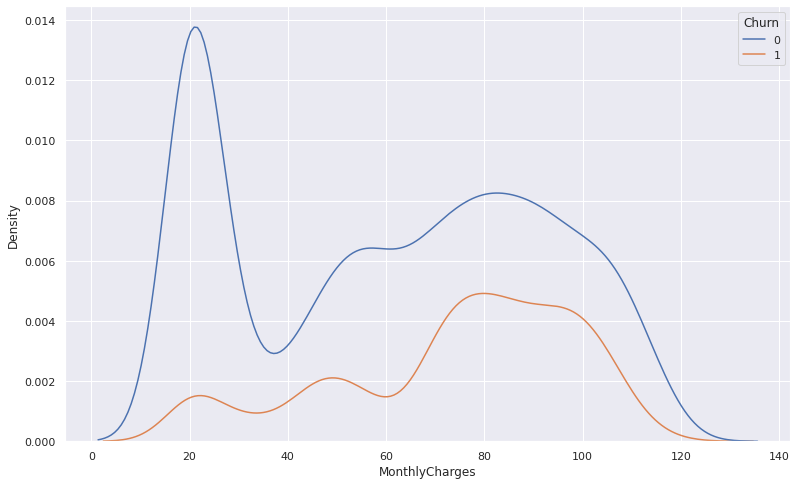

In [ ]:
sns.set(rc = {'figure.figsize':(13,8)})
sns.kdeplot(data=churn, x='MonthlyCharges', hue='Churn', label='Churn')

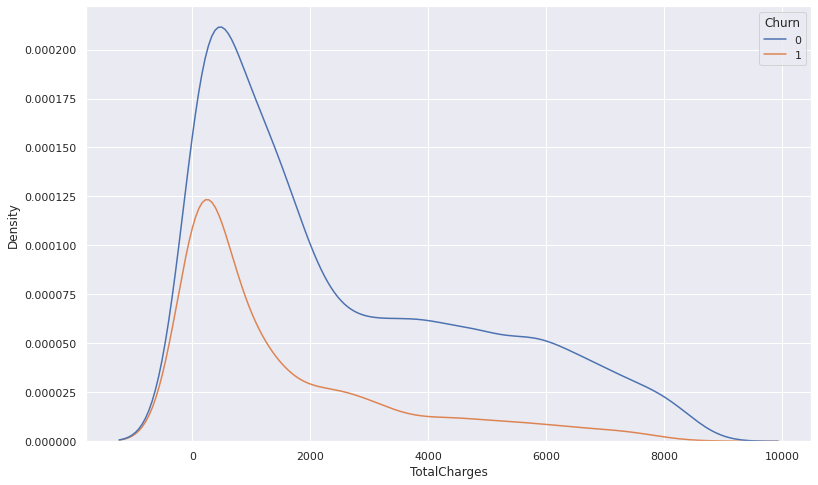

In [ ]:
sns.set(rc = {'figure.figsize':(13,8)})
sns.kdeplot(data=churn, x='TotalCharges', hue='Churn', label='Churn')

### Numerical Features Evaluation

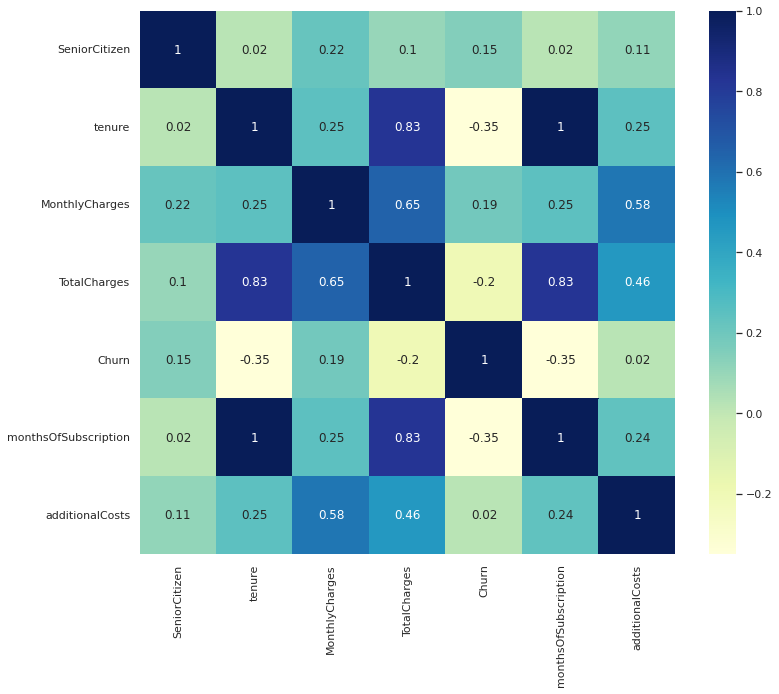

In [ ]:
sns.set(rc = {'figure.figsize':(12,10)})
corr = churn.corr()
ax = sns.heatmap(round(corr, 2), annot=True, cmap="YlGnBu")



`monthsOfSubscription` ha an excessive correlation with `tenure`, so it is removed from the dataset





In [ ]:
churn = churn.drop(['monthsOfSubscription'], axis=1)

Plotting features having high correlation

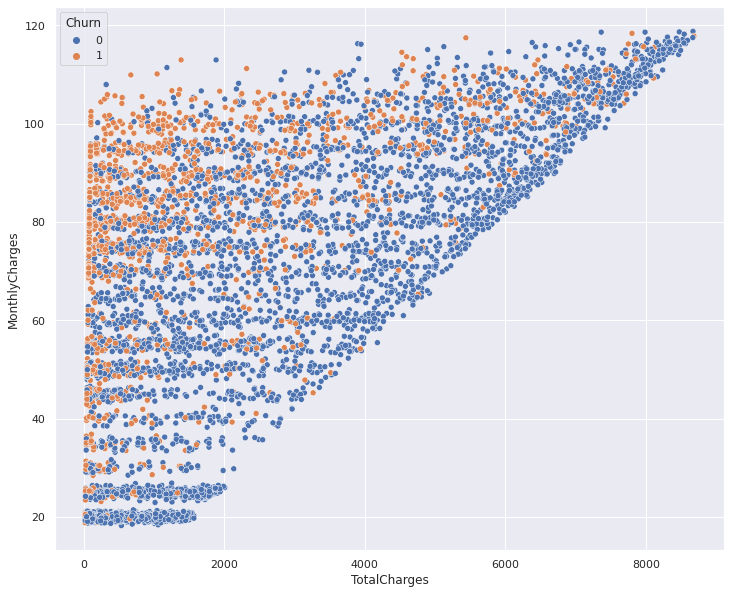

In [ ]:
sns.set(rc = {'figure.figsize':(12,10)})
sct_charge = sns.scatterplot(data=churn, x='TotalCharges', y='MonthlyCharges', hue='Churn')

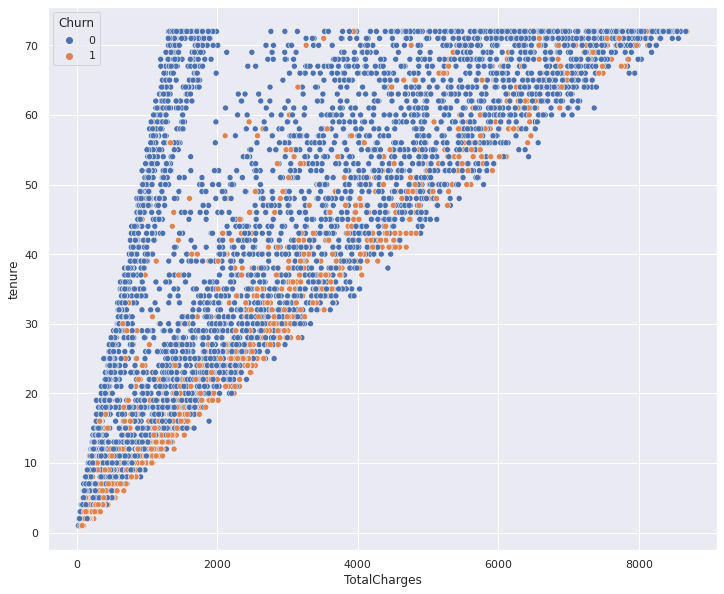

In [ ]:
sns.set(rc = {'figure.figsize':(12,10)})
sct_charge = sns.scatterplot(data=churn, x='TotalCharges', y='tenure', hue='Churn')

Let's make the categorical features as binaries

In [ ]:
to_binarize = ['gender', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

for b in to_binarize:
  if b == 'gender':
    churn[b] = churn[b].apply(lambda x : 1 if x == 'Male' else 0)
  else:
    churn[b] = churn[b].apply(lambda x : 1 if x == 'Yes' else 0)

churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,additionalCosts
0,0,0,1,0,1,0,No phone service,DSL,0,1,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,0.00
1,1,0,0,0,34,1,No,DSL,1,0,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,10.15
2,1,0,0,0,2,1,No,DSL,1,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,0.45
3,1,0,0,0,45,0,No phone service,DSL,1,0,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,21.85
4,0,0,0,0,2,1,No,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,10.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,24,1,Yes,DSL,1,0,...,1,1,1,One year,1,Mailed check,84.80,1990.50,0,40.10
7028,0,0,1,1,72,1,Yes,Fiber optic,0,1,...,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0,35.70
7029,0,0,1,1,11,0,No phone service,DSL,1,0,...,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0,20.85
7030,1,1,1,0,4,1,Yes,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1,9.00


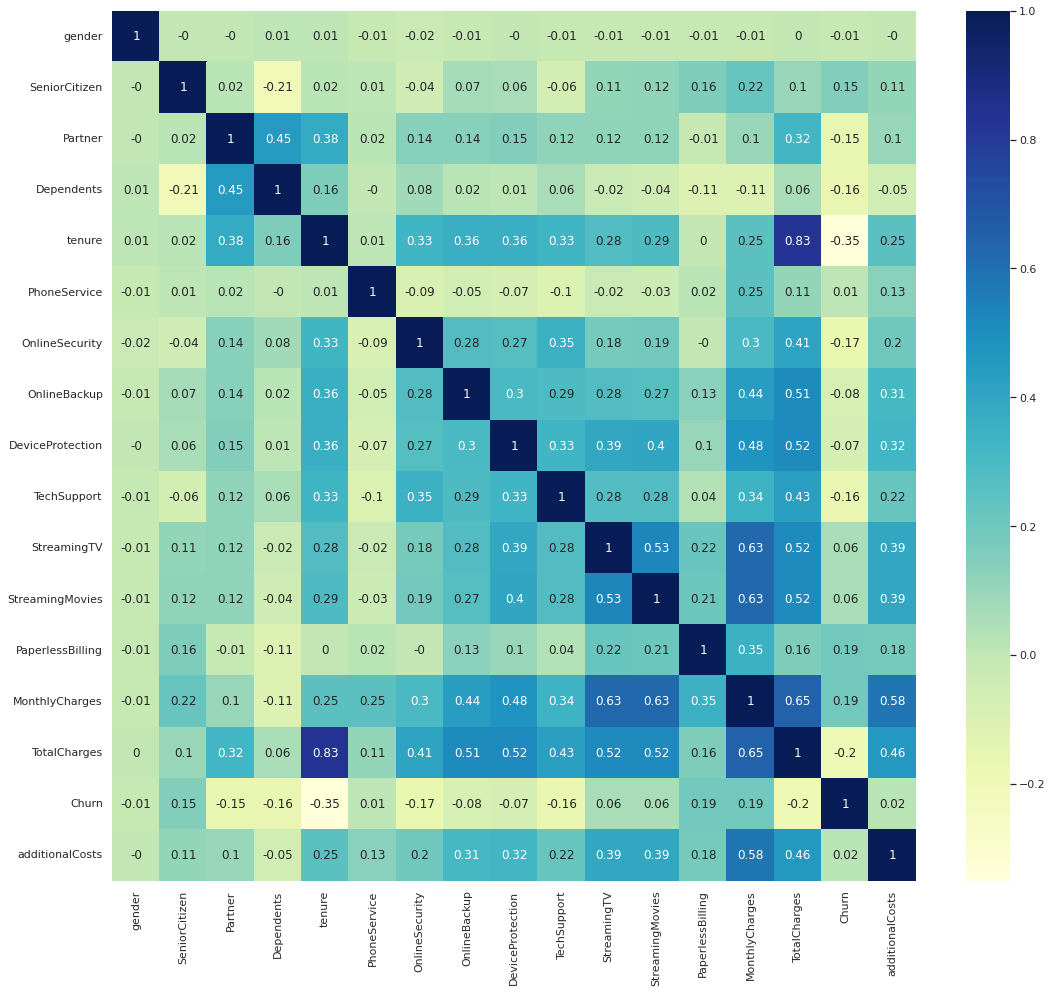

In [ ]:
sns.set(rc = {'figure.figsize':(18,16)})
corr = churn.corr()
ax = sns.heatmap(round(corr, 2), annot=True, cmap="YlGnBu")

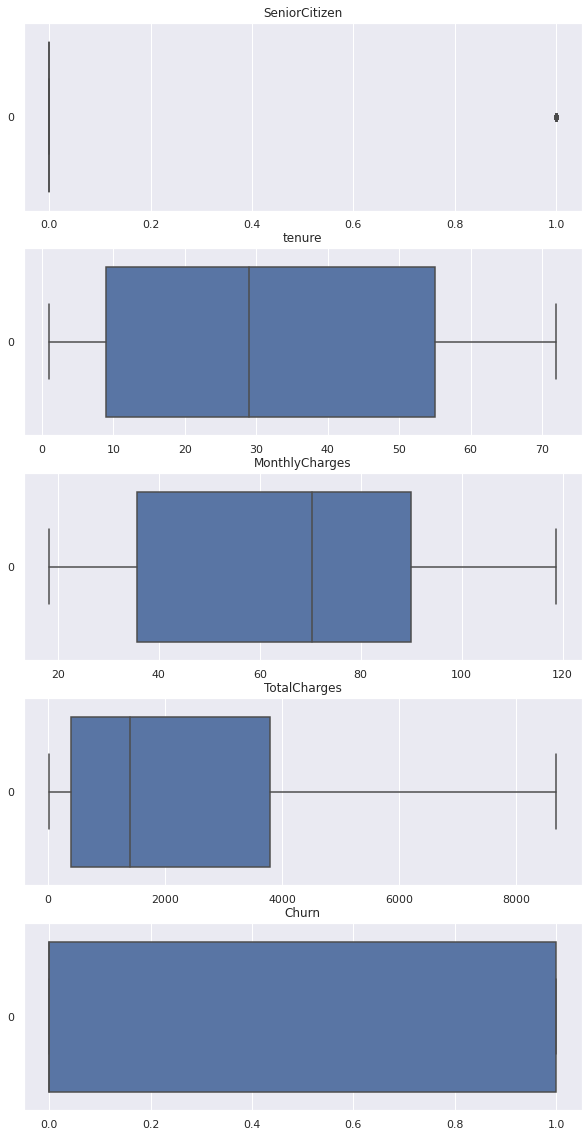

In [ ]:
fig = plt.figure(figsize=(10,20))

#sns.set(rc = {'figure.figsize':(10,5)})
for i, num in enumerate(numerical):
  plt.subplot(len(numerical), 1, i+1)
  ax = sns.boxplot(data=churn[num], orient='h')
  plt.title(num)
plt.show()

In [ ]:
original_churn = churn.copy()

numerical, _ = get_feature_types(churn)

for num in numerical:
  dummy_num = pd.get_dummies(data=churn[num], prefix=num, prefix_sep='__')
  churn = pd.concat([churn, dummy_num], axis=1)
  churn = churn.drop([num], axis=1)
churn
#pd.get_dummies(data=churn, prefix=['InternetService', 'MultipleLines'], prefix_sep='__')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService__DSL,InternetService__Fiber optic,InternetService__No,Contract__Month-to-month,Contract__One year,Contract__Two year,PaymentMethod__Bank transfer (automatic),PaymentMethod__Credit card (automatic),PaymentMethod__Electronic check,PaymentMethod__Mailed check
0,0,0,1,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,24,1,1,0,1,1,...,1,0,0,0,1,0,0,0,0,1
7028,0,0,1,1,72,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
7029,0,0,1,1,11,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
7030,1,1,1,0,4,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


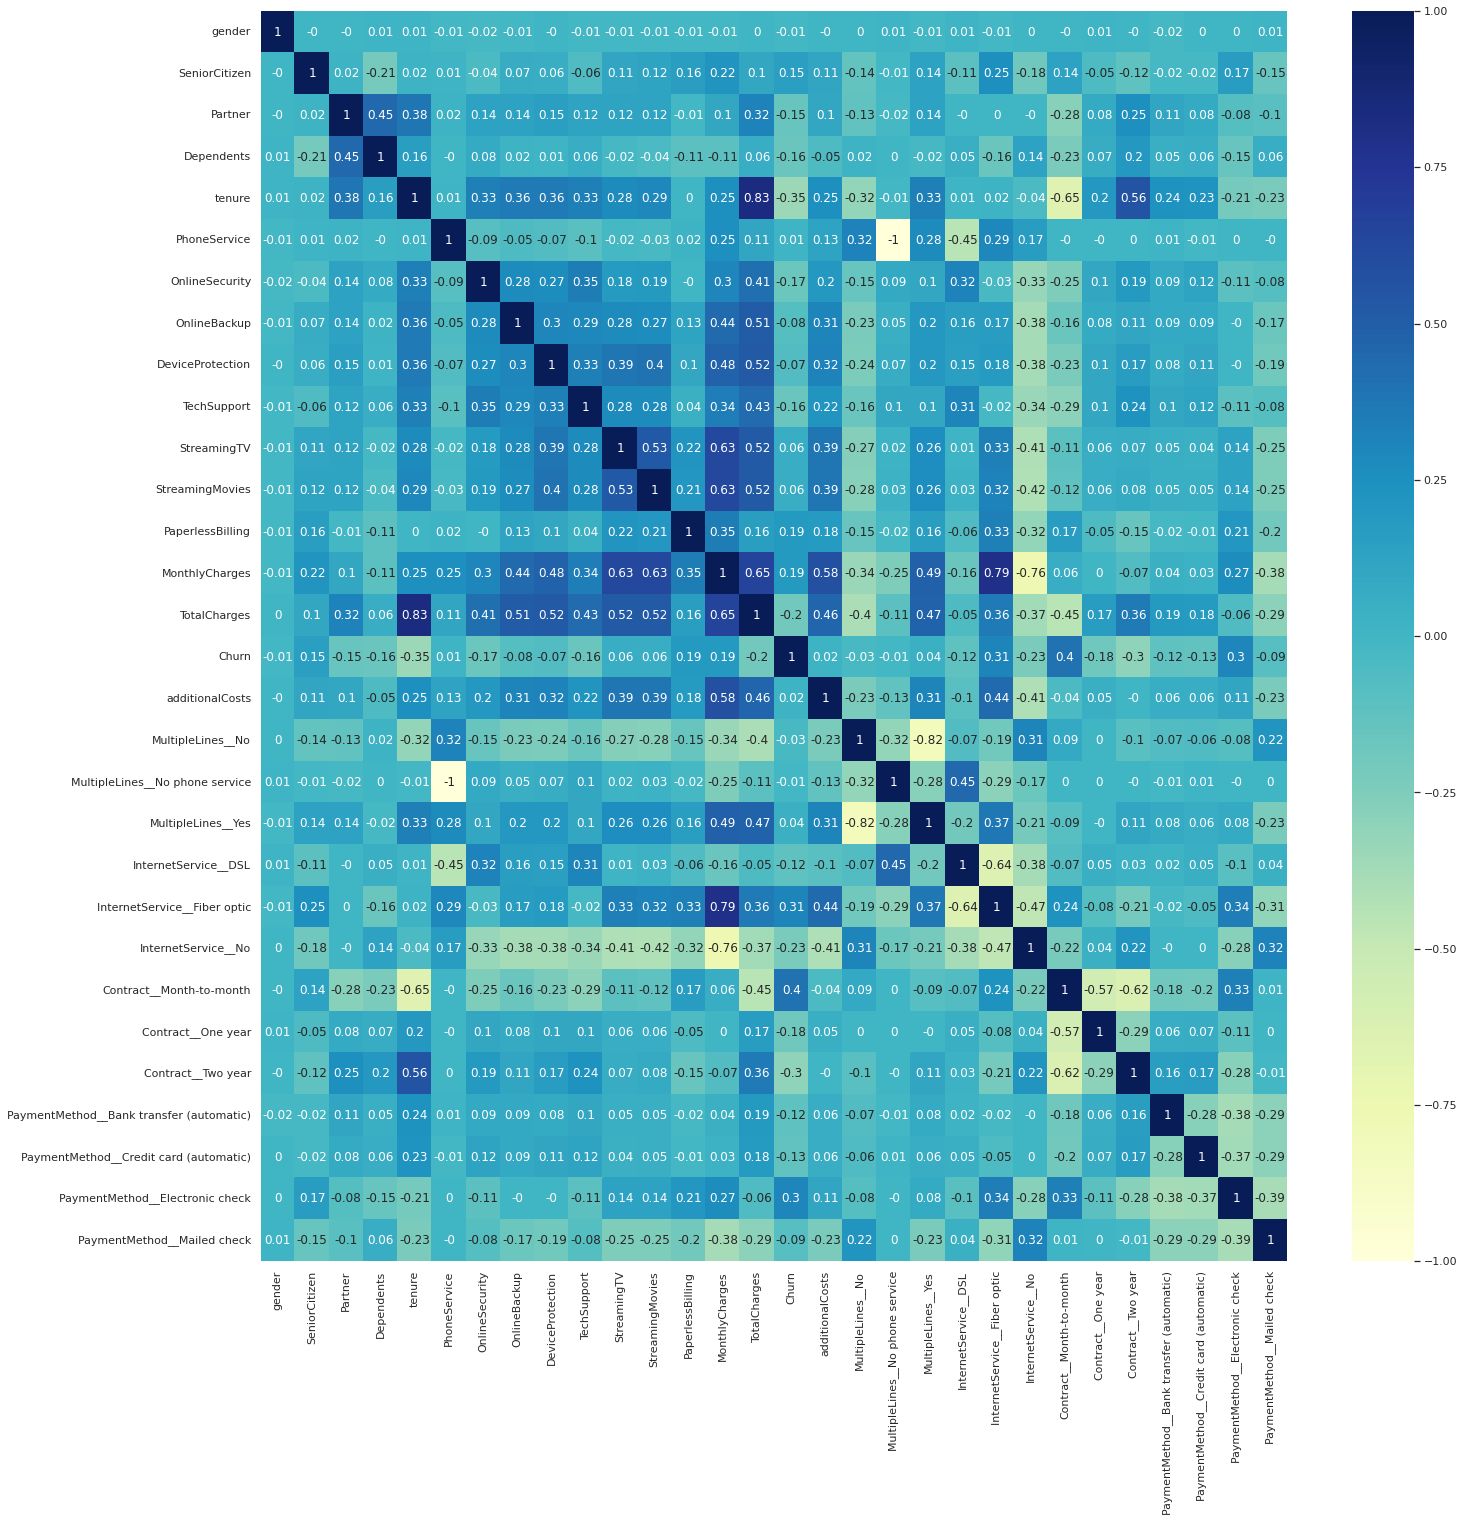

In [ ]:
sns.set(rc = {'figure.figsize':(23,23)})
corr = churn.corr()
ax = sns.heatmap(round(corr, 2), annot=True, cmap="YlGnBu")

### Testing several classifiers

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import NuSVC, SVC

from catboost import CatBoostClassifier, cv, Pool
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, plot_precision_recall_curve, f1_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(churn.drop(['Churn'], axis=1), churn['Churn'], test_size=0.2)
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(original_churn.drop(['Churn'], axis=1), original_churn['Churn'], test_size=0.2)

In [ ]:
def testing_classifiers(scaler, X_train, y_train, X_train_original, y_train_original, X, X_original, target, fold, categorical, classifiers, metrics):
  
  classifiers_result = {}
  resulting_classifiers = []
  
  for classi in classifiers:
    print(type(classi).__name__)
    performances = {}

    if type(classi).__name__ != 'CatBoostClassifier':
      pipe = make_pipeline(scaler, classi)
      pipe.fit(X=X_train, y=y_train)
      pipe[1].feature_names = list(X_train.columns.values)
      scores = cross_validate(estimator=pipe[1], X=pipe[0].transform(X.drop([target], axis=1)), y=X[target], scoring=['accuracy', 'precision', 'recall', 'f1'], cv=10)

      performances['Accuracy'] = sum(scores['test_accuracy'])/fold
      performances['Precision'] = sum(scores['test_precision'])/fold
      performances['Recall'] = sum(scores['test_recall'])/fold
      performances['F1'] = sum(scores['test_f1'])/fold

      classifiers_result[type(classi).__name__] = performances
      resulting_classifiers.append(pipe)
    else:
      cbt_elements = []
      classi.fit(X=X_train_original, y=y_train_original, cat_features=categorical, verbose=0)

      the_pool = Pool(data=X_original.drop([target], axis=1), label=X_original[[target]], cat_features=categorical)

      for met in metrics:
        df_res = cv(the_pool, params={'iterations' : 200, 'eval_metric' : met, 'loss_function' : 'CrossEntropy'}, fold_count=fold, plot=False, verbose=False)
        performances[met] = df_res.iloc[-1, 1]
      
      classifiers_result['CatBoostClassifier'] = performances
      cbt_elements.append(the_pool)
      cbt_elements.append(classi)
      resulting_classifiers.append(cbt_elements)
  
    resulting_performances = pd.DataFrame.from_dict(classifiers_result, orient='index')
  return resulting_classifiers, resulting_performances

In [ ]:
original_churn.drop(['Churn'], axis=1).columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'additionalCosts'], dtype=object)

In [ ]:
classifiers = [LogisticRegression(max_iter=200), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), SVC(gamma='scale',decision_function_shape='ovo'),
XGBClassifier(), CatBoostClassifier()]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
categorical, _ = get_feature_types(original_churn)

classi_res, df_results = testing_classifiers(scaler=StandardScaler(), X_train=X_train, y_train=y_train, X_train_original=X_train_original, y_train_original=y_train_original, 
                                 X=churn, X_original=original_churn, target='Churn', fold=10, categorical=categorical, classifiers=classifiers, metrics=metrics)

LogisticRegression
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
SVC
XGBClassifier
CatBoostClassifier
Training on fold [0/10]

bestTest = 0.7883522727
bestIteration = 32

Training on fold [1/10]

bestTest = 0.8295454545
bestIteration = 68

Training on fold [2/10]

bestTest = 0.8193456615
bestIteration = 148

Training on fold [3/10]

bestTest = 0.8108108108
bestIteration = 48

Training on fold [4/10]

bestTest = 0.8079658606
bestIteration = 195

Training on fold [5/10]

bestTest = 0.8065433855
bestIteration = 42

Training on fold [6/10]

bestTest = 0.8079658606
bestIteration = 174

Training on fold [7/10]

bestTest = 0.8193456615
bestIteration = 111

Training on fold [8/10]

bestTest = 0.8108108108
bestIteration = 134

Training on fold [9/10]

bestTest = 0.8207681366
bestIteration = 80

Training on fold [0/10]

bestTest = 0.6263736264
bestIteration = 14

Training on fold [1/10]

bestTest = 0.7259259259
bestIteration = 68

Training on fold [2/10]

bestTest = 0.7549

In [ ]:
df_results.sort_values(by=['F1'], ascending=False)

,Accuracy,Precision,Recall,F1
LogisticRegression,0.805175,0.660403,0.549488,0.599597
AdaBoostClassifier,0.805741,0.667849,0.535579,0.594209
GradientBoostingClassifier,0.804463,0.666840,0.529685,0.590089
CatBoostClassifier,0.806173,0.671378,0.523307,0.587819
XGBClassifier,0.804604,0.669749,0.523271,0.587299
SVC,0.796074,0.653566,0.496507,0.563881
RandomForestClassifier,0.793655,0.648232,0.493301,0.559841


### Model explaination with SHAP

In [ ]:
import shap

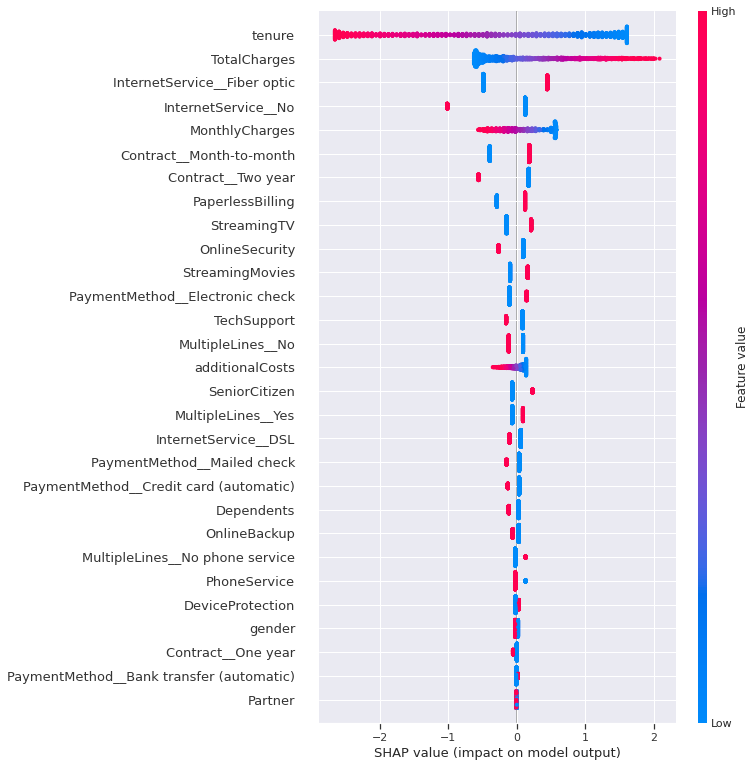

In [ ]:
# Logistic Regression

explainer = shap.Explainer(classi_res[0][1], classi_res[0][0].transform(X_train), feature_names=classi_res[0][1].feature_names)
shap_values = explainer(classi_res[0][0].transform(X_test))
shap.plots.beeswarm(shap_values, max_display=29)

* There's no chance to plot SHAP Values for AdaBoost, due to support missing.

  Source: https://github.com/slundberg/shap/issues/335
* There's no summary plot for Support Vector Classifier due to the huge amount of time that `KernelExplainer` needs



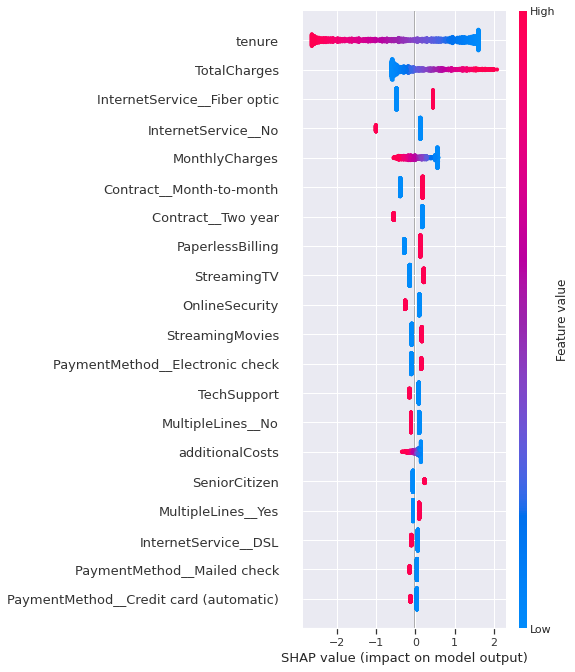

In [ ]:
# Random Forest Classifier

explainer = shap.TreeExplainer(classi_res[1][1])
shap_value = explainer.shap_values(classi_res[1][0].transform(X_test))
shap.summary_plot(shap_values, classi_res[1][0].transform(X_test), feature_names = classi_res[1][1].feature_names)

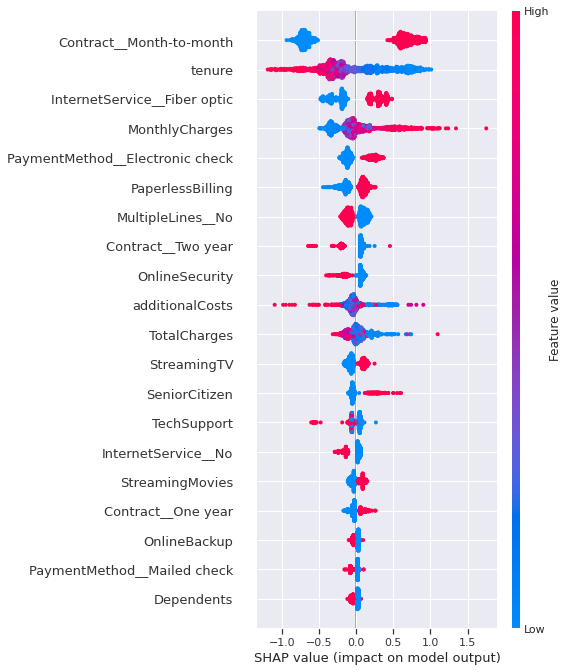

In [ ]:
# Gradient Boosting Classifier

explainer = shap.TreeExplainer(classi_res[3][1])
shap_values = explainer.shap_values(classi_res[3][0].transform(X_test))
shap.summary_plot(shap_values, classi_res[3][0].transform(X_test), feature_names = classi_res[3][1].feature_names)

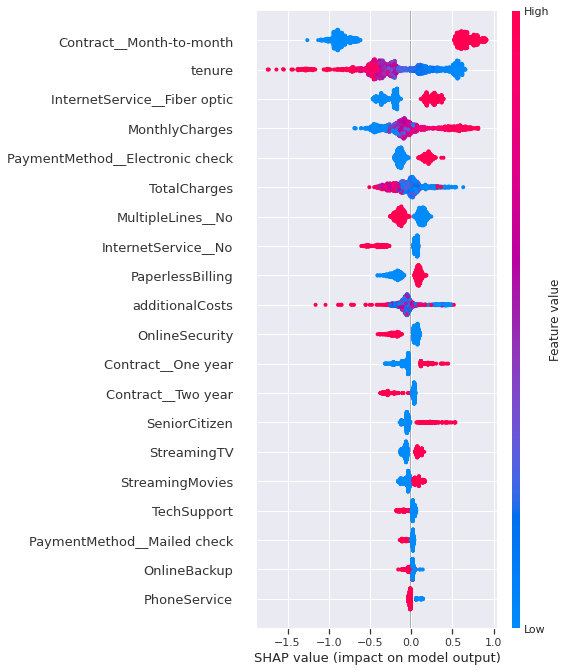

In [ ]:
# XGBoost Classifier

explainer = shap.TreeExplainer(classi_res[5][1])
shap_values = explainer.shap_values(classi_res[5][0].transform(X_test))
shap.summary_plot(shap_values, classi_res[5][0].transform(X_test), feature_names = classi_res[5][1].feature_names)

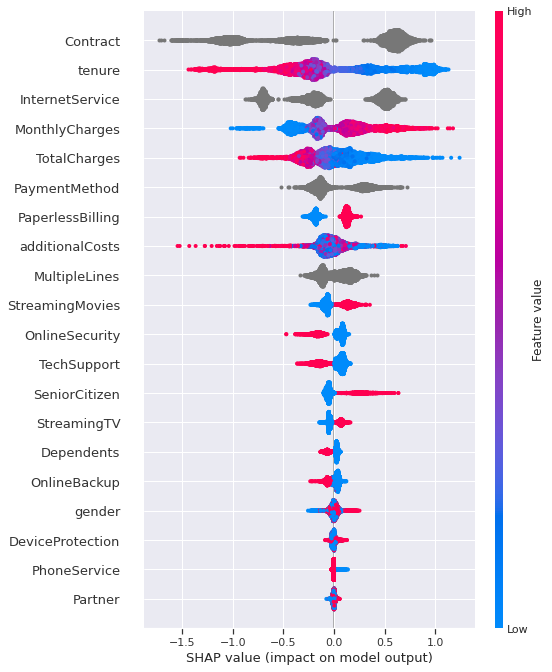

In [ ]:
# CatBoost Classifier

X_original = original_churn.drop(['Churn'], axis=1)
y_original = original_churn[['Churn']]

explainer = shap.TreeExplainer(classi_res[6][1])
shap_values = explainer.shap_values(Pool(X_original, y_original, cat_features=categorical))
shap.summary_plot(shap_values, X_original)

### Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

import numpy as np

In [ ]:
churn_cluster = churn[churn['Churn'] == 1][['tenure', 'MonthlyCharges']]
churn_cluster

,tenure,MonthlyCharges
2,2,53.85
4,2,70.70
5,8,99.65
8,28,104.80
13,49,103.70
...,...,...
7010,12,59.80
7015,9,44.20
7021,1,75.75
7023,67,102.95


In [ ]:
scaler = StandardScaler()
churn_cluster_scaled = pd.DataFrame(data=churn_cluster, columns=churn_cluster.columns)
churn_cluster_scaled 

,tenure,MonthlyCharges
2,2,53.85
4,2,70.70
5,8,99.65
8,28,104.80
13,49,103.70
...,...,...
7010,12,59.80
7015,9,44.20
7021,1,75.75
7023,67,102.95


In [ ]:
kmeans_args = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_args)
    kmeans.fit(churn_cluster_scaled)
    sse.append(kmeans.inertia_)

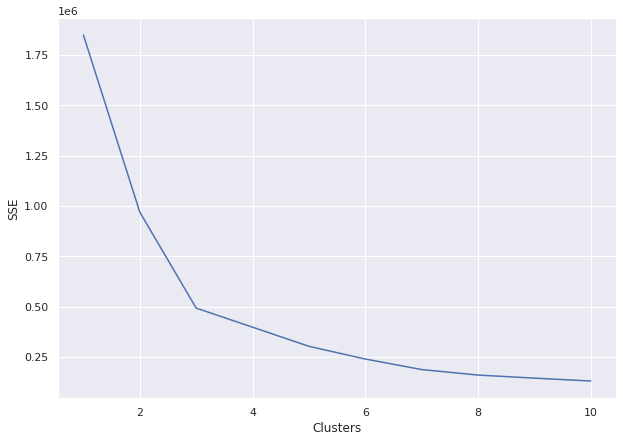

In [ ]:
SSE_df = pd.DataFrame(data=[[*range(1, 11)],sse]).T
SSE_df = SSE_df.astype({0 : int})
SSE_df = SSE_df.rename(columns={0 : 'Clusters', 1 : 'SSE'})

sns.set(rc = {'figure.figsize':(10,7)})
sns.lineplot(data=SSE_df, x='Clusters', y='SSE');

Elbow method: best value for `k` is 3

In [ ]:
kmeans_real = KMeans(n_clusters=3)
kmeans_real.fit(churn_cluster_scaled)

churn_cluster_scaled['Cluster'] = kmeans_real.labels_
cluster_centers = pd.DataFrame(data=kmeans_real.cluster_centers_)
churn_cluster

,tenure,MonthlyCharges,Cluster
2,2,53.85,1
4,2,70.70,2
5,8,99.65,2
8,28,104.80,0
13,49,103.70,0
...,...,...,...
7010,12,59.80,1
7015,9,44.20,1
7021,1,75.75,2
7023,67,102.95,0


In [ ]:
cluster_centers

,0,1
0,47.629032,94.052074
1,9.213251,38.807764
2,8.909664,83.579937


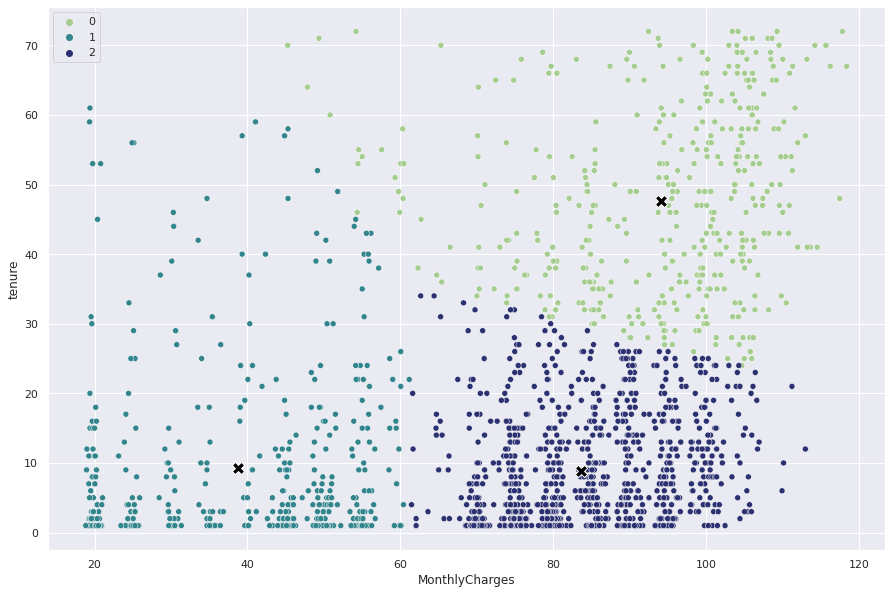

In [ ]:
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.scatterplot(data=churn_cluster_scaled, x='MonthlyCharges', y='tenure', hue='Cluster', palette='crest')
ax = sns.scatterplot(data=cluster_centers, x=1, y=0, marker='X', color='black', s=150)
plt.show()

### Gaussian Mixture Model

In [ ]:
churn_cluster = churn[churn['Churn'] == 1][['tenure', 'MonthlyCharges']]
scaler = StandardScaler()
churn_cluster_scaled = pd.DataFrame(data=churn_cluster, columns=churn_cluster.columns)
churn_cluster_scaled 

,tenure,MonthlyCharges
2,2,53.85
4,2,70.70
5,8,99.65
8,28,104.80
13,49,103.70
...,...,...
7010,12,59.80
7015,9,44.20
7021,1,75.75
7023,67,102.95


In [ ]:
def SelBest(arr, X):
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [ ]:
n_clusters = range(2, 8)
silhouettes = []
silhouette_error = []
iterations = 40

for n in n_clusters:
  temp_silhouette =  []

  for _ in range(iterations):
    gmm = GaussianMixture(n, n_init=2)
    gmm.fit(churn_cluster_scaled)
    predictions = gmm.predict(churn_cluster_scaled)
    silhouette = silhouette_score(churn_cluster_scaled, labels = predictions, metric='euclidean')
    temp_silhouette.append(silhouette)
  
  value = np.mean(SelBest(np.array(temp_silhouette), int(iterations/5)))
  error = np.std(temp_silhouette)
  silhouettes.append(value)
  silhouette_error.append(error)

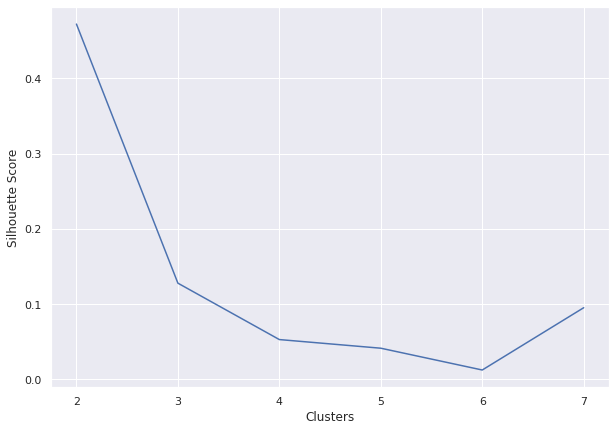

In [ ]:
sil_df = pd.DataFrame(data=[n_clusters, silhouettes]).T
sil_df = sil_df.astype({0 : int})
sil_df = sil_df.rename(columns={0 : 'Clusters', 1 : 'Silhouette Score'})

sns.set(rc = {'figure.figsize':(10,7)})
sns.lineplot(data=sil_df, x='Clusters', y='Silhouette Score');

Best silhouette score is returned when clusters are 2

In [ ]:
gmm_real = GaussianMixture(n_components=2)
gmm_real.fit(churn_cluster_scaled)

churn_cluster_scaled['Cluster'] = gmm_real.predict(churn_cluster_scaled)
churn_cluster_scaled

,tenure,MonthlyCharges,Cluster
2,2,53.85,1
4,2,70.70,0
5,8,99.65,0
8,28,104.80,0
13,49,103.70,0
...,...,...,...
7010,12,59.80,1
7015,9,44.20,1
7021,1,75.75,0
7023,67,102.95,0


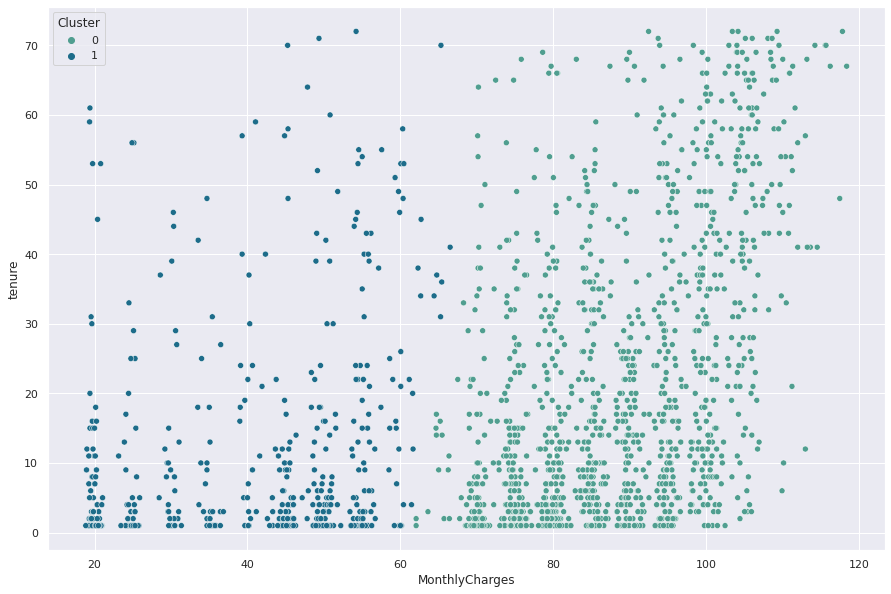

In [ ]:
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.scatterplot(data=churn_cluster_scaled, x='MonthlyCharges', y='tenure', hue='Cluster', palette='crest')
plt.show()

### Bayesian information criterion (BIC)

In [ ]:
n_clusters=np.arange(2, 8)
bics=[]
bics_err=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(churn_cluster_scaled) 
        
        tmp_bic.append(gmm.bic(churn_cluster_scaled))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

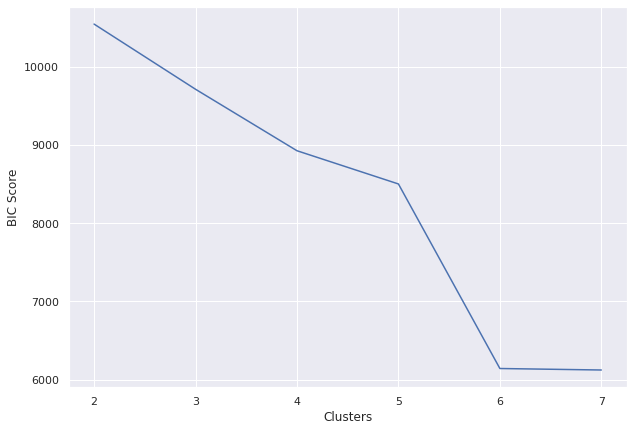

In [ ]:
sil_df['BIC Score'] = bics

sns.set(rc = {'figure.figsize':(10,7)})
sns.lineplot(data=sil_df, x='Clusters', y='BIC Score');